In [1]:
import tensorflow as tf
import numpy as np

# Define 5x5 input matrix
input_matrix = tf.constant([[1, 2, 3, 0, 1],
                            [0, 1, 2, 3, 0],
                            [1, 2, 1, 0, 1],
                            [0, 1, 2, 3, 1],
                            [1, 2, 0, 1, 2]], dtype=tf.float32)

# Reshape to 4D tensor: (batch, height, width, channels)
input_tensor = tf.reshape(input_matrix, [1, 5, 5, 1])

# Define 3x3 kernel
kernel = tf.constant([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Function to perform convolution
def perform_convolution(input_tensor, kernel, stride, padding):
    return tf.nn.conv2d(input_tensor, kernel, strides=[1, stride, stride, 1], padding=padding)

# Stride=1, Padding=VALID
print("Stride=1, Padding=VALID\n", perform_convolution(input_tensor, kernel, 1, 'VALID').numpy().squeeze())

# Stride=1, Padding=SAME
print("Stride=1, Padding=SAME\n", perform_convolution(input_tensor, kernel, 1, 'SAME').numpy().squeeze())

# Stride=2, Padding=VALID
print("Stride=2, Padding=VALID\n", perform_convolution(input_tensor, kernel, 2, 'VALID').numpy().squeeze())

# Stride=2, Padding=SAME
print("Stride=2, Padding=SAME\n", perform_convolution(input_tensor, kernel, 2, 'SAME').numpy().squeeze())


Stride=1, Padding=VALID
 [[-4.  2.  4.]
 [-4. -2.  3.]
 [-1.  1. -1.]]
Stride=1, Padding=SAME
 [[-3. -4.  0.  4.  3.]
 [-5. -4.  2.  4.  3.]
 [-4. -4. -2.  3.  6.]
 [-5. -1.  1. -1.  4.]
 [-3. -1. -1. -1.  4.]]
Stride=2, Padding=VALID
 [[-4.  4.]
 [-1. -1.]]
Stride=2, Padding=SAME
 [[-3.  0.  3.]
 [-4. -2.  6.]
 [-3. -1.  4.]]


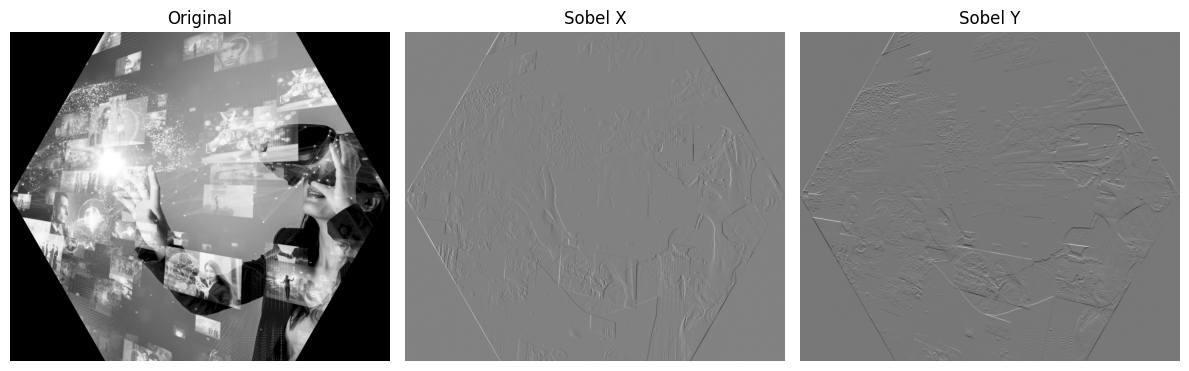


Max-pooled 2×2 matrix:
 [[8 6]
 [7 9]]

Average-pooled 2×2 matrix:
 [[4.75 4.  ]
 [4.   7.  ]]


In [8]:
"""
CS5720 – Home Assignment 2
Task 1: Sobel edge detection
Task 2: 2×2 Max & Average pooling on a random 4×4 matrix
"""

# ------------------ imports ------------------
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ------------------ Task 1 – Sobel edges ------------------
# 1. Load your own image (grayscale)
img = cv2.imread("my image.png", cv2.IMREAD_GRAYSCALE)

# 2. Apply Sobel-X and Sobel-Y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)        # X-direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)        # Y-direction

# 3. Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img,     cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(sobel_x, cmap="gray"); plt.title("Sobel X"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(sobel_y, cmap="gray"); plt.title("Sobel Y"); plt.axis("off")
plt.tight_layout(); plt.show()

# ------------------ Task 2 – Pooling ------------------
# 1. Random 4×4 input “image”
rng = np.random.default_rng(seed=42)                   # fixed seed for repeatability
input_matrix = rng.integers(low=0, high=10, size=(1, 4, 4, 1)).astype(np.float32)

# 2. 2×2 Max Pooling (VALID padding)
max_pool = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding="VALID")

# 3. 2×2 Average Pooling (VALID padding)
avg_pool = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding="VALID")

# 4. Print results
print("\nMax-pooled 2×2 matrix:\n", max_pool.numpy().squeeze().astype(int))
print("\nAverage-pooled 2×2 matrix:\n", avg_pool.numpy().squeeze().round(2))


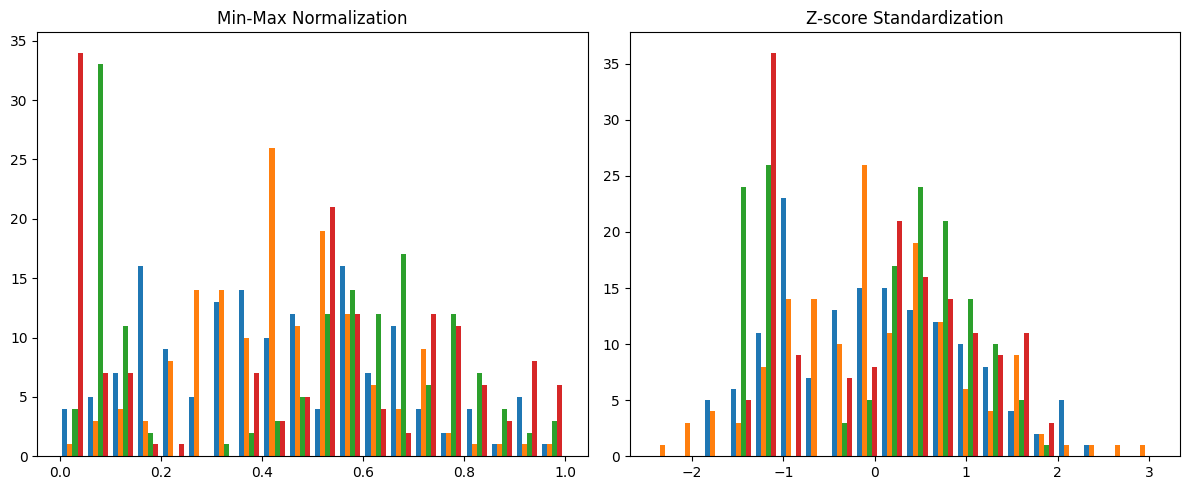

Original Accuracy: 0.9777777777777777
Normalized Accuracy: 0.8888888888888888
Standardized Accuracy: 0.9777777777777777


In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Normalization
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

# Standardization
std = StandardScaler()
X_std = std.fit_transform(X)

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X_norm, bins=20)
plt.title("Min-Max Normalization")

plt.subplot(1, 2, 2)
plt.hist(X_std, bins=20)
plt.title("Z-score Standardization")
plt.tight_layout()
plt.show()

# Logistic Regression Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Xn_train, Xn_test = train_test_split(X_norm, test_size=0.3, random_state=0)
Xs_train, Xs_test = train_test_split(X_std, test_size=0.3, random_state=0)

model = LogisticRegression()

# Original
model.fit(X_train, y_train)
print("Original Accuracy:", model.score(X_test, y_test))

# Normalized
model.fit(Xn_train, y_train)
print("Normalized Accuracy:", model.score(Xn_test, y_test))

# Standardized
model.fit(Xs_train, y_train)
print("Standardized Accuracy:", model.score(Xs_test, y_test))
